In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline                

In [31]:
df = pd.read_csv('C:/CODE/Python/Py_Mineria/Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


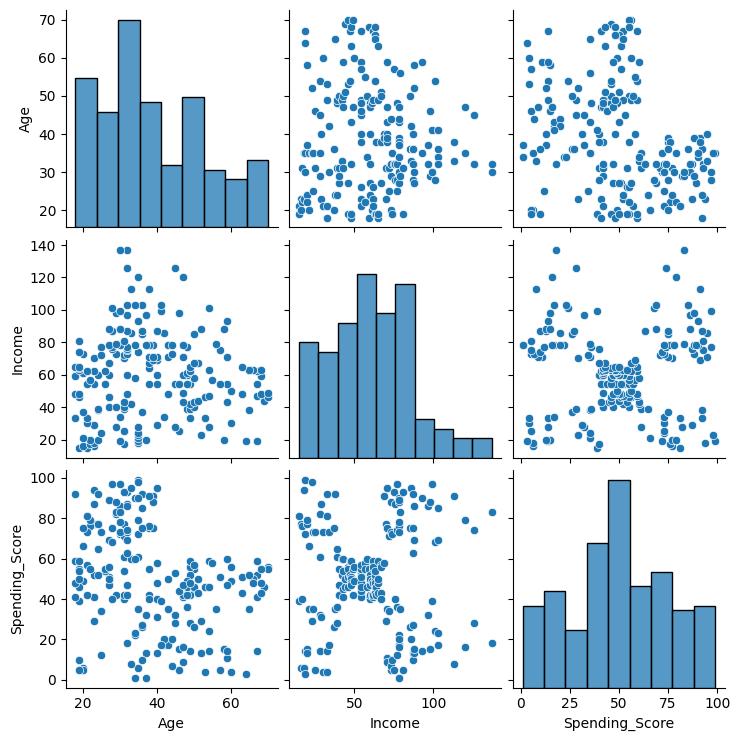

In [33]:
sns.pairplot(df[['Age','Income', 'Spending_Score']])

In [34]:
import sklearn.cluster as cluster

In [35]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

In [36]:
kmeans.cluster_centers_

array([[17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [20.91304348, 26.30434783],
       [82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ]])

In [37]:
df['Clusters'] = kmeans.labels_

In [38]:
df['Clusters'].value_counts()

Clusters
4    81
3    39
0    35
2    23
1    22
Name: count, dtype: int64

<Axes: xlabel='Spending_Score', ylabel='Income'>

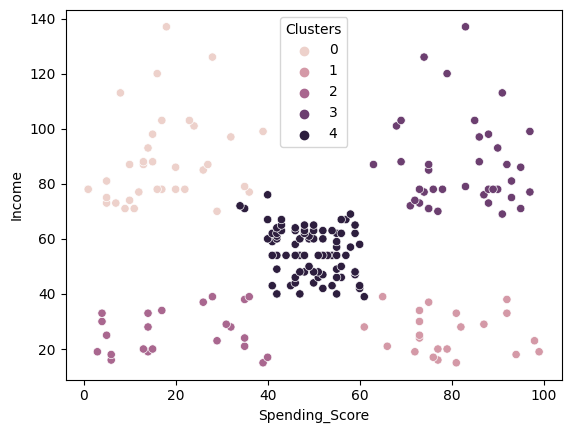

In [39]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)